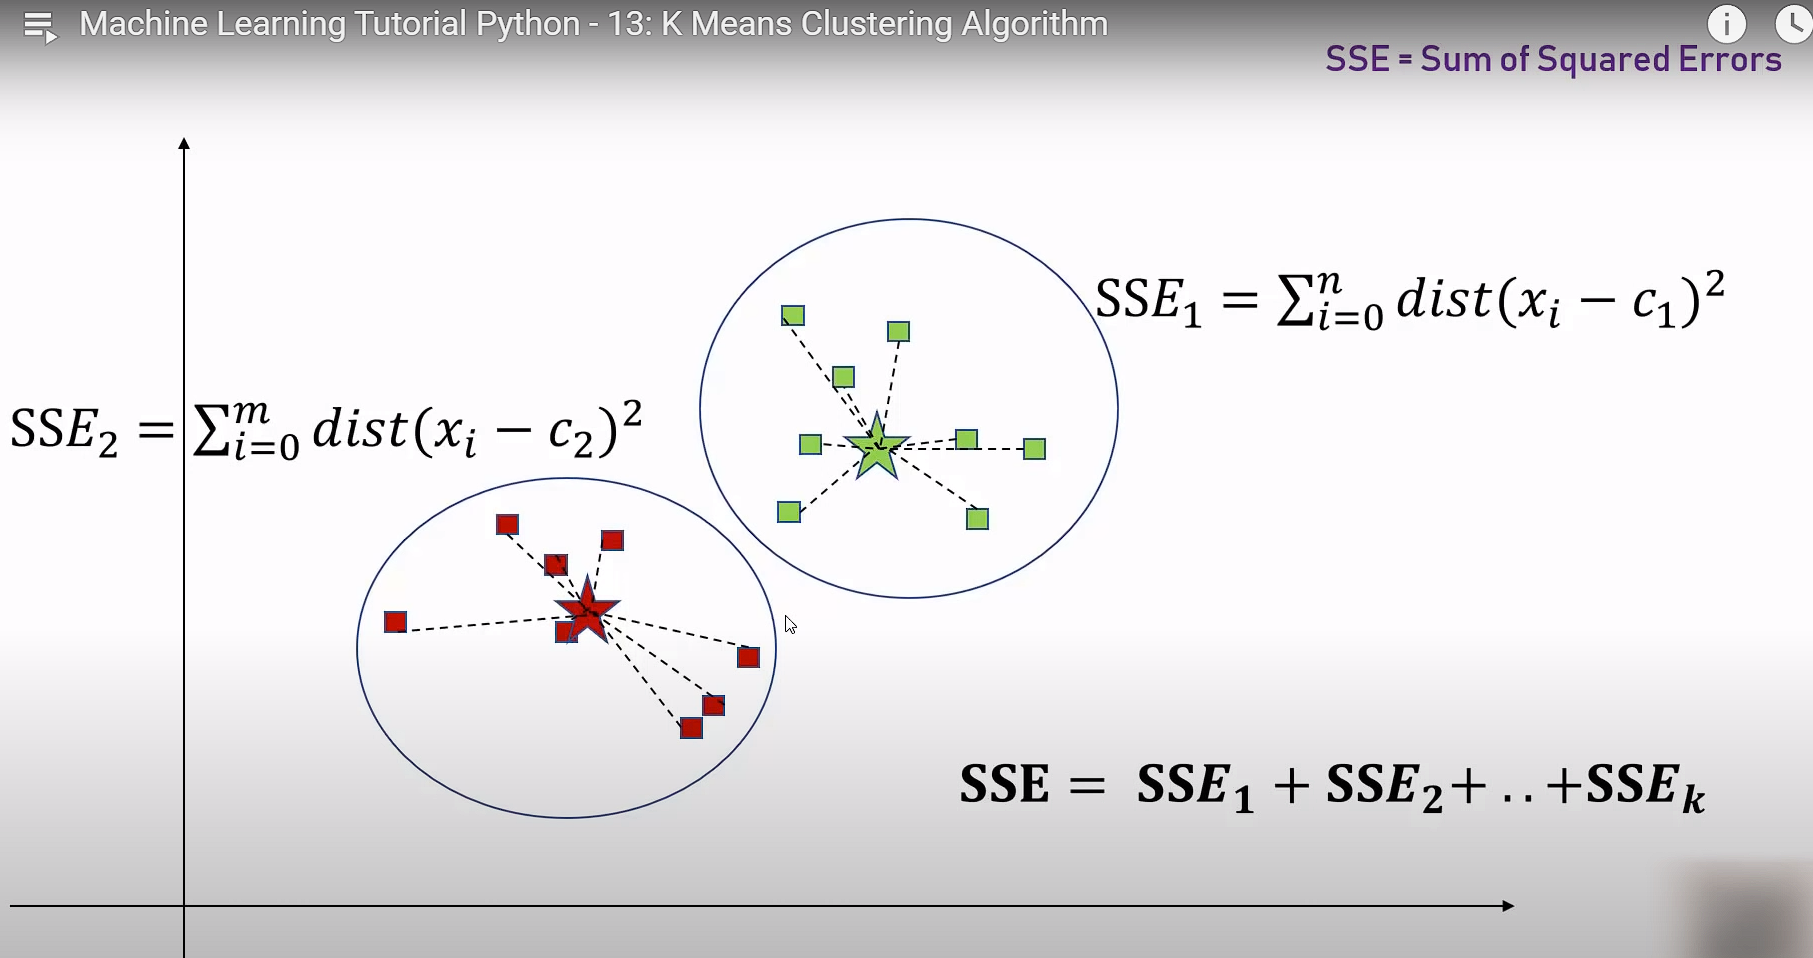

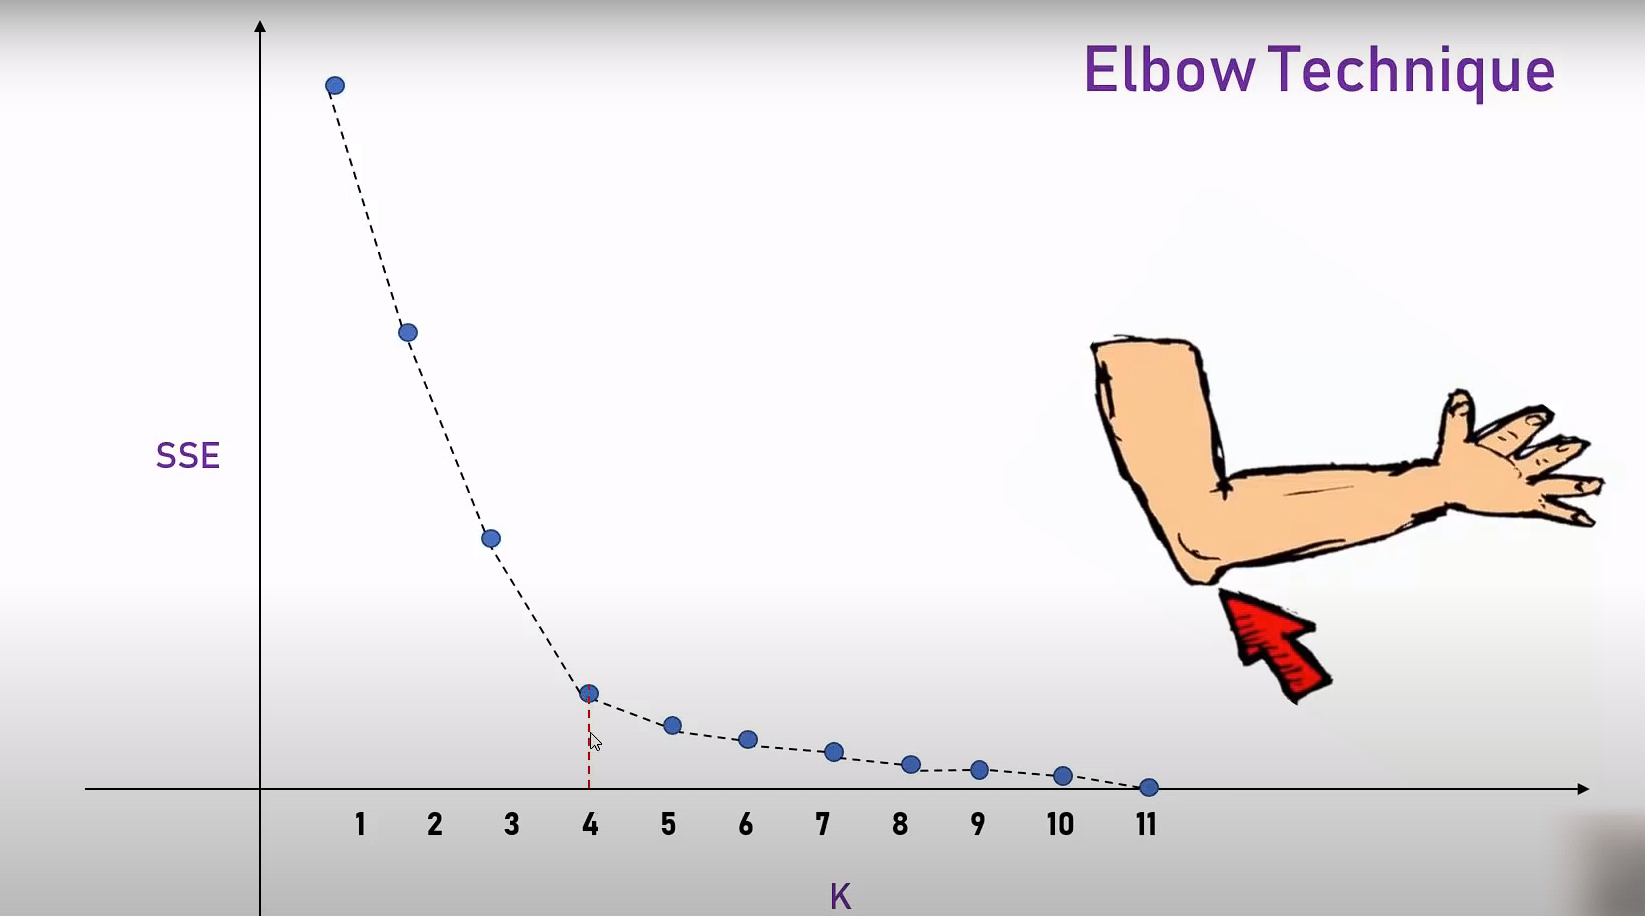

Using Elbow Method to find the best value for K clusters to form. 

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('income.csv')

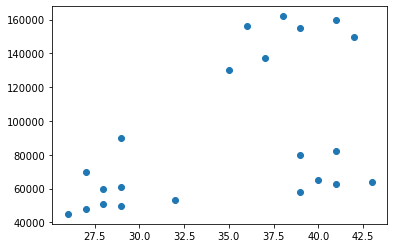

In [6]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [12]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [13]:
df['cluster'] = y_predicted
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

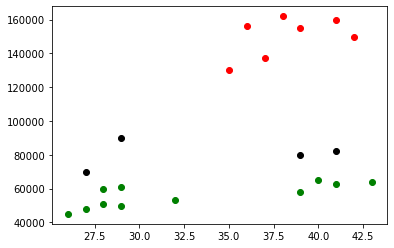

In [14]:
plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

Intuitionly, the clustering doesn't seem right. This problem arises due to the scale problem. As, you can see, the income bar is on the scale of 10s of thousands but the age isn't. So, using MinMaxScaler() from the preprocessing library, feature scaling or mean normalization should be performed before clustering. 

In [39]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']]) # Compute the minimum and maximum to be used for later scaling.
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [40]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [41]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted

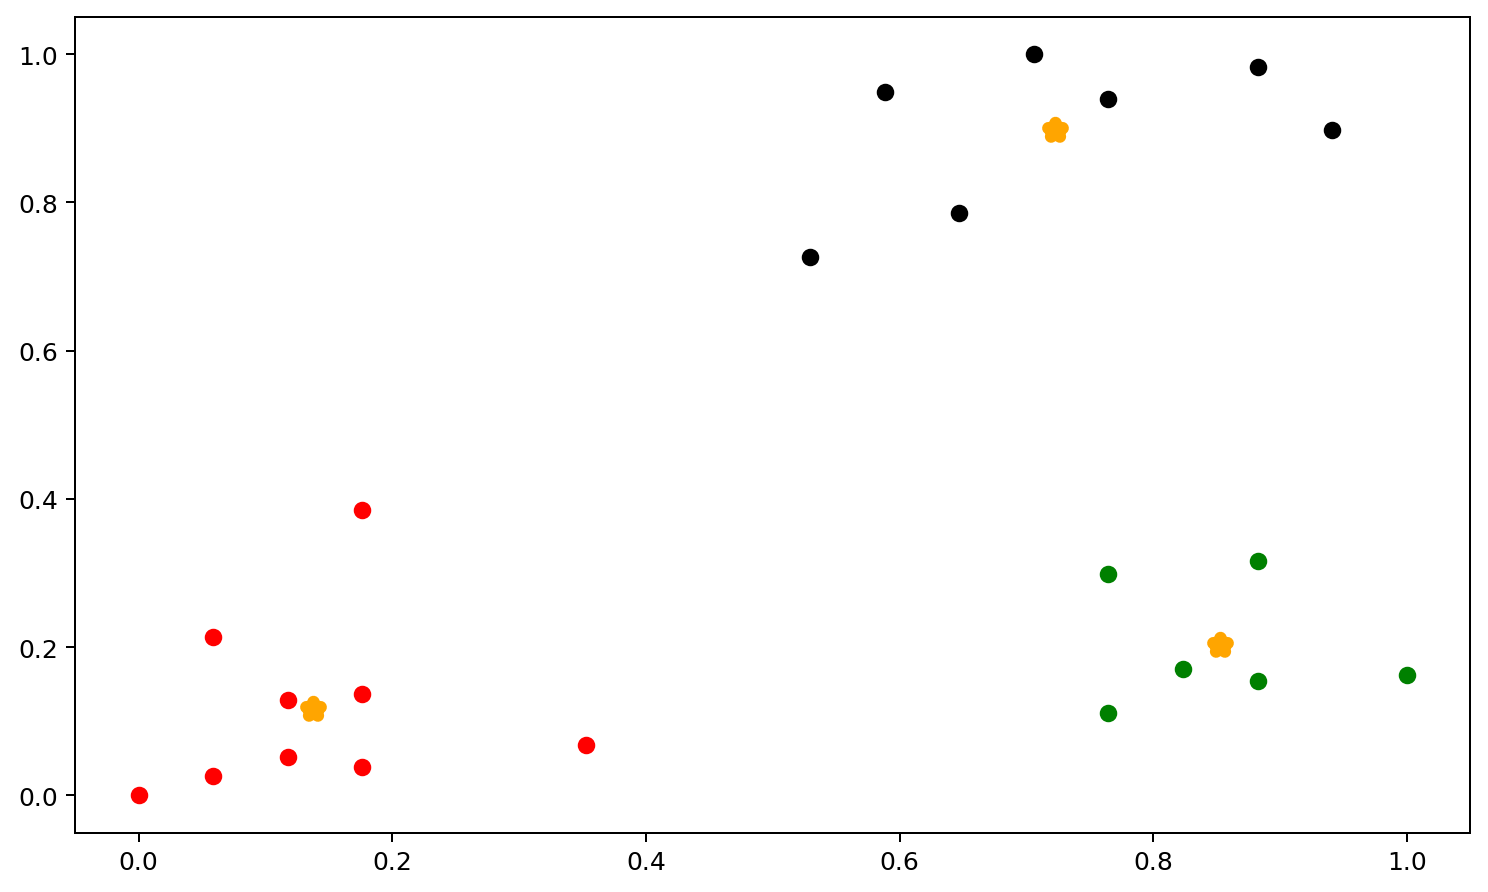

In [54]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.figure(figsize = (10, 6), dpi = 180)
plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'orange', marker = '*', linewidths=5)
plt.show()

In [58]:
k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)


C:\Users\parzi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


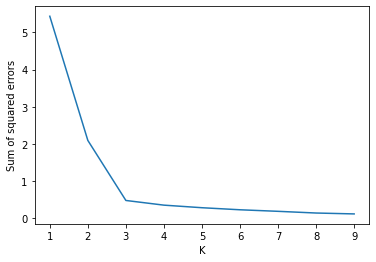

In [59]:
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_range, sse)

### Exercise

In [60]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [77]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
df = df.drop('sepal length (cm)', axis = 1)
df = df.drop('sepal width (cm)', axis = 1)

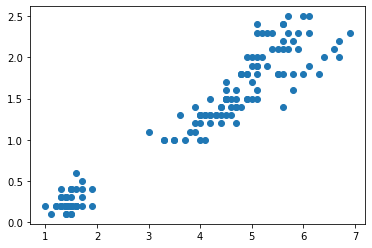

In [81]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [82]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'] = y_predicted

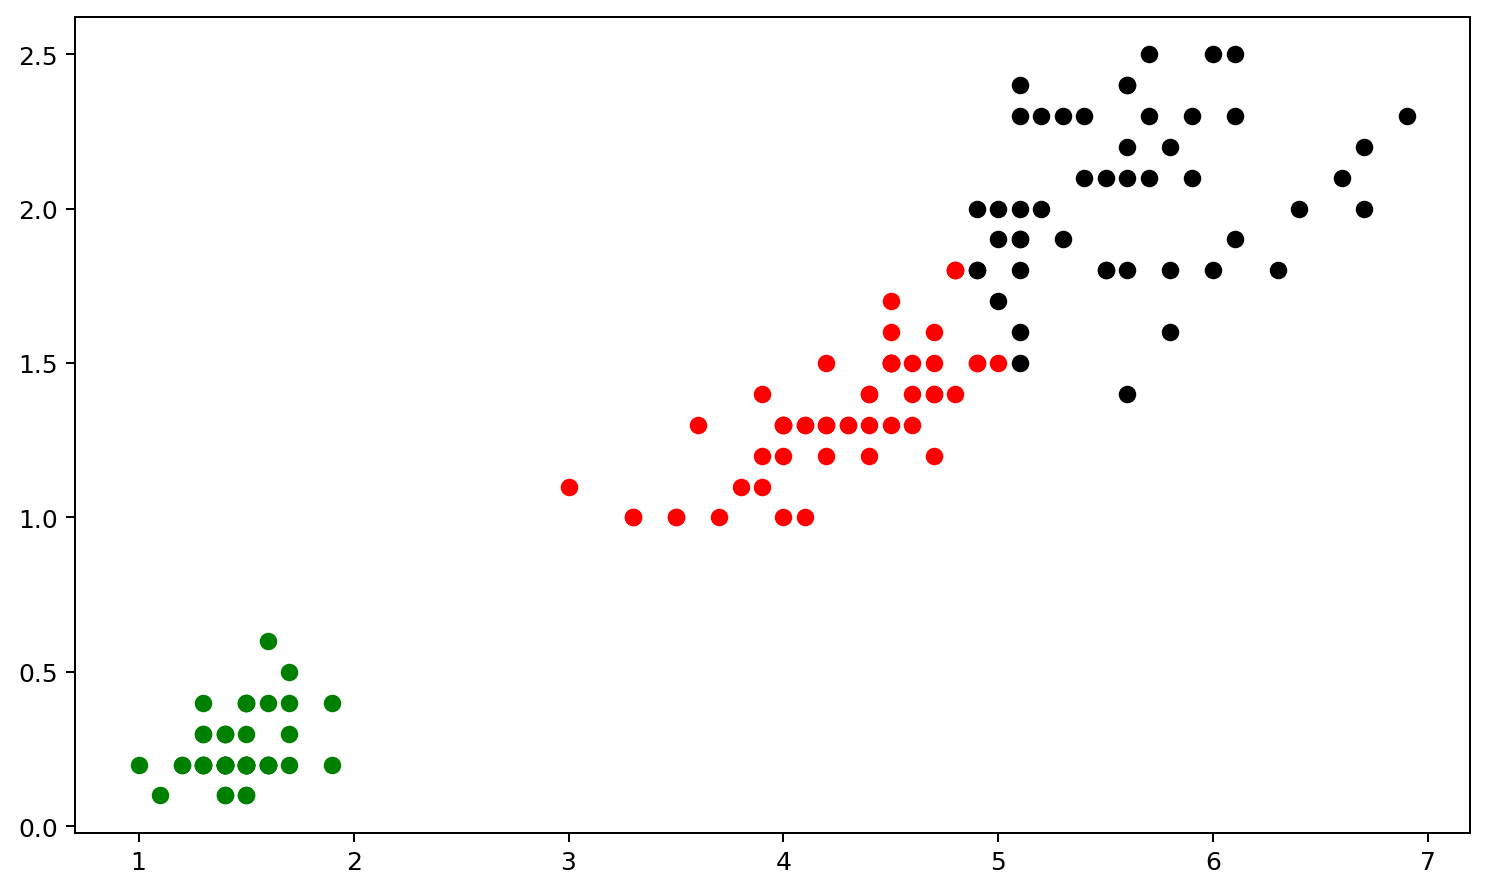

In [84]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.figure(figsize = (10, 6), dpi = 180)
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'black')
plt.show()